# Business Cleaning and EDA
In this notebook, business dataset was cleaned and joined with reviews features. EDA was conducted based on processed data.

In [1]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
folder = "E:/taniesta/Columbia University/Courses Files/Semester II/Applied ML in Fin/project data/"
bus_dt = pd.read_csv(folder+"filtered_businesses_atts.csv")

In [3]:
bus_dt.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'RestaurantsReservations',
       'Open24Hours', 'RestaurantsGoodForGroups', 'BikeParking', 'Corkage',
       'DogsAllowed', 'OutdoorSeating', 'HappyHour', 'HasTV', 'NoiseLevel',
       'DietaryRestrictions', 'ByAppointmentOnly', 'Caters', 'GoodForMeal',
       'BYOBCorkage', 'RestaurantsCounterService', 'RestaurantsTableService',
       'WheelchairAccessible', 'RestaurantsTakeOut',
       'BusinessAcceptsCreditCards', 'AcceptsInsurance', 'Ambience',
       'RestaurantsPriceRange2', 'Alcohol', 'GoodForDancing', 'Smoking',
       'BestNights', 'BusinessAcceptsBitcoin', 'GoodForKids',
       'RestaurantsDelivery', 'RestaurantsAttire', 'DriveThru', 'BYOB',
       'BusinessParking', 'CoatCheck', 'Music', 'WiFi', 'AgesAllowed

In [4]:
len(bus_dt.columns)

59

In [83]:
#Get features whose missing value rates are lower than .35
names = ['RestaurantsReservations']
for name in bus_dt.columns:
    if bus_dt[name].isnull().mean()<0.35:
        names.append(name)
print(names)
len(names)

['RestaurantsReservations', 'business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'GoodForKids', 'RestaurantsDelivery', 'RestaurantsAttire', 'BusinessParking', 'WiFi']


34

In [84]:
#The number of restaurants in each city
print(bus_dt['city'].value_counts())
for name in names[22:]:
    print(bus_dt[name].value_counts())
    print(mode(bus_dt[name]))
    print("\n")

Las Vegas                  1665
Henderson                   213
North Las Vegas             108
Boulder City                 13
Las  Vegas                    3
N Las Vegas                   2
Paradise                      2
Nellis AFB                    1
Henderson and Las vegas       1
Enterprise                    1
N. Las Vegas                  1
NELLIS AFB                    1
LAS VEGAS                     1
Clark                         1
Name: city, dtype: int64
False    964
True     415
Name: RestaurantsReservations, dtype: int64
False


True     1292
False     114
None        1
Name: RestaurantsGoodForGroups, dtype: int64
True


True     1025
False     433
None        1
Name: BikeParking, dtype: int64
True


False    1022
True      405
None        1
Name: OutdoorSeating, dtype: int64
False


True     1511
False     192
None        2
Name: RestaurantsTakeOut, dtype: int64
True


True     1878
False      27
Name: BusinessAcceptsCreditCards, dtype: int64
True


1       876
2      

In [85]:
#Replace the missing values with the mode of each column
feature_cols = [ 'city', 'review_count', 'is_open', 'RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'GoodForKids', 'RestaurantsDelivery', 'RestaurantsAttire']
features = pd.DataFrame()
def replace_mode(name):
    new = bus_dt[name]
    replace = mode(bus_dt[name])
    if name not in ['RestaurantsReservations', 'RestaurantsGoodForGroups', 'BikeParking', 'OutdoorSeating', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'GoodForKids', 'RestaurantsDelivery']:
        new[new.isnull()] = replace
    else:
        new[new.isnull()] = False
    if name not in [ 'city', 'review_count','is_open']:
        new[new == "None"] = replace
    return pd.DataFrame(new)
for name in feature_cols:
    features = pd.concat([features, replace_mode(name)], axis=1)
    print(replace_mode(name).iloc[:,0].value_counts())
features.head()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Las Vegas                  1665
Henderson                   213
North Las Vegas             108
Boulder City                 13
Las  Vegas                    3
N Las Vegas                   2
Paradise                      2
Nellis AFB                    1
Henderson and Las vegas       1
Enterprise                    1
N. Las Vegas                  1
NELLIS AFB                    1
LAS VEGAS                     1
Clark                         1
Name: city, dtype: int64
3      109
5       61
4       58
6       54
7       47
10      47
11      42
16      39
8       39
12      37
9       34
13      29
14      28
17      27
28      25
24      24
15      23
25      22
20      22
19      21
35      20
21      20
26      20
36      19
23      19
18      18
22      16
29      16
31      16
39      15
      ... 
542      1
550      1
553      1
437      1
435      1
429      1
395      1
374      1
376      1
378      1
380      1
381      1
383      1
386      1
389      1
392      1
394      1

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


False    1598
True      415
Name: RestaurantsReservations, dtype: int64
True     1293
False     606
False     114
Name: RestaurantsGoodForGroups, dtype: int64
True     1026
False     554
False     433
Name: BikeParking, dtype: int64
False    1023
False     585
True      405
Name: OutdoorSeating, dtype: int64
True     1513
False     308
False     192
Name: RestaurantsTakeOut, dtype: int64
True     1878
False     135
Name: BusinessAcceptsCreditCards, dtype: int64
1    1046
2     865
3      81
4      21
Name: RestaurantsPriceRange2, dtype: int64
True     1202
False     596
False     215
Name: GoodForKids, dtype: int64
False    1658
True      355
Name: RestaurantsDelivery, dtype: int64
'casual'     1339
u'casual'     623
u'dressy'      25
'dressy'       23
u'formal'       2
'formal'        1
Name: RestaurantsAttire, dtype: int64


,city,review_count,is_open,RestaurantsReservations,RestaurantsGoodForGroups,BikeParking,OutdoorSeating,RestaurantsTakeOut,BusinessAcceptsCreditCards,RestaurantsPriceRange2,GoodForKids,RestaurantsDelivery,RestaurantsAttire
0,Las Vegas,184,1,False,True,True,False,True,True,1,True,False,u'casual'
1,Las Vegas,76,1,False,False,True,True,True,True,2,False,False,'casual'
2,Las Vegas,3,1,False,False,False,False,False,False,1,False,False,'casual'
3,Las Vegas,77,0,False,True,False,False,True,True,1,True,True,u'casual'
4,Henderson,3,1,False,False,False,False,False,False,1,False,False,'casual'


In [86]:
features["RestaurantsAttire"] = pd.DataFrame([s.split("'")[1] for s in features["RestaurantsAttire"]])

In [87]:
df = pd.concat([bus_dt['business_id'],bus_dt['stars'],features], axis=1)
df.head()
df.to_csv(folder+"cleaned_features.csv")

In [88]:
#Join the data with the features from reviews (pcs)
pc_review = pd.read_csv(folder+"reviews_tfidf_pcs.csv")
join_df = df.set_index('business_id').join(pc_review.set_index('business_id'))
join_df.isnull().sum()
join_df.to_csv(folder+"joined_features_May_15.csv")

In [108]:
#Join the data with the features from reviews (words without pca)
word_review = pd.read_csv(folder+"reviews_tfidf_words.csv")
join_word_df = df.set_index('business_id').join(word_review.set_index('business_id'))
join_word_df.isnull().sum()
join_word_df.to_csv(folder+"joined_features_words.csv")
join_word_df.head()

,stars,city,review_count,is_open,RestaurantsReservations,RestaurantsGoodForGroups,BikeParking,OutdoorSeating,RestaurantsTakeOut,BusinessAcceptsCreditCards,...,walk,well,what,when,which,while,will,with,would,your
business_id,,,,,,,,,,,,,,,,,,,,,
tstimHoMcYbkSC4eBA1wEg,4.5,Las Vegas,184,1,False,True,True,False,True,True,...,0.008715,0.066055,0.019096,0.047699,0.034750,0.002947,0.033781,0.081356,0.032585,0.022260
sKhDrZFCJqfRNylkHrIDsQ,4.0,Las Vegas,76,1,False,False,True,True,True,True,...,0.019516,0.039990,0.031083,0.068600,0.018805,0.014298,0.023909,0.073238,0.021295,0.034812
4n81G-pmC3rfhmaPsbwYKg,4.5,Las Vegas,3,1,False,False,False,False,False,False,...,0.000000,0.181918,0.000000,0.000000,0.097404,0.000000,0.043797,0.062978,0.000000,0.175022
eY98EH_PHGnJVaJ7t2UpoQ,4.0,Las Vegas,77,0,False,True,False,False,True,True,...,0.009936,0.007482,0.040245,0.038922,0.025627,0.025356,0.014810,0.081511,0.032014,0.055278
iA9xu-6oOFynZQxO5qrauQ,3.0,Henderson,3,1,False,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.228085,0.057067,0.000000


In [89]:
join_df = join_df.drop(columns='Unnamed: 0')

<IPython.core.display.Javascript object>


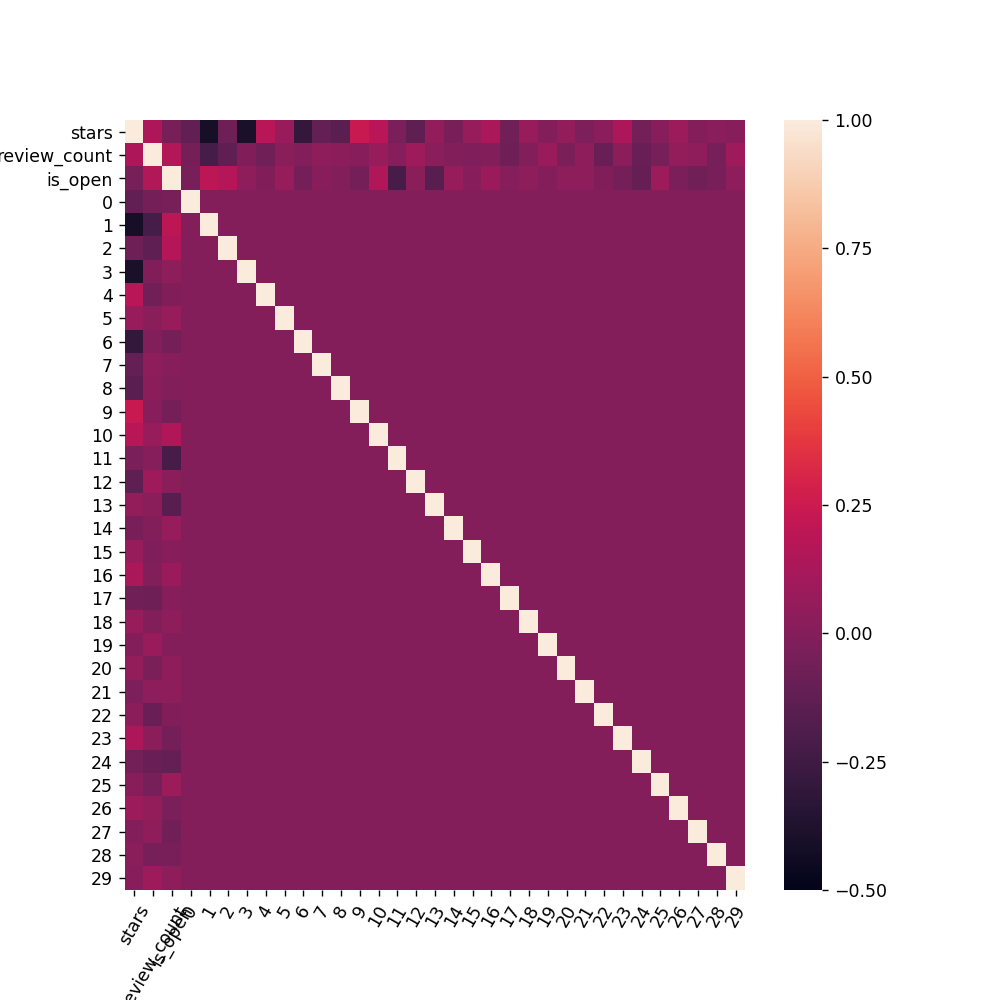

[Text(0,0,'stars'),
 Text(0,0,'review_count'),
 Text(0,0,'is_open'),
 Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9'),
 Text(0,0,'10'),
 Text(0,0,'11'),
 Text(0,0,'12'),
 Text(0,0,'13'),
 Text(0,0,'14'),
 Text(0,0,'15'),
 Text(0,0,'16'),
 Text(0,0,'17'),
 Text(0,0,'18'),
 Text(0,0,'19'),
 Text(0,0,'20'),
 Text(0,0,'21'),
 Text(0,0,'22'),
 Text(0,0,'23'),
 Text(0,0,'24'),
 Text(0,0,'25'),
 Text(0,0,'26'),
 Text(0,0,'27'),
 Text(0,0,'28'),
 Text(0,0,'29')]

In [90]:
plt.figure(figsize = (8,8))
g = sns.heatmap(join_df.corr(),vmin=-.5,vmax=1)
g.set_xticklabels(g.get_xticklabels(),rotation=60)
g.set_yticklabels(g.get_yticklabels(),rotation=0)

<IPython.core.display.Javascript object>


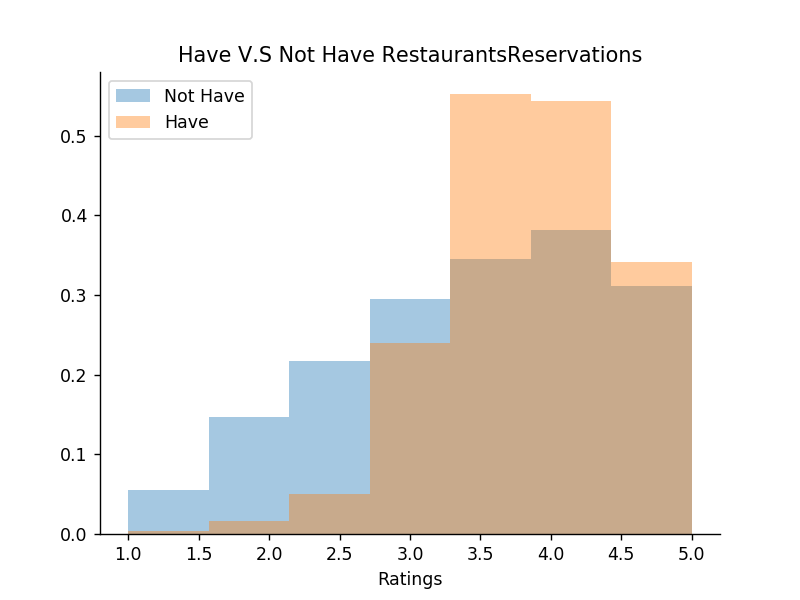

In [91]:
plt.figure()
plt.hist(join_df[join_df.RestaurantsReservations == False]['stars'],label = 'Not Have',density = True,alpha = 0.4,bins = 7);
plt.hist(join_df[join_df.RestaurantsReservations == True]['stars'],label = 'Have',density = True,alpha = 0.4,bins = 7);
sns.despine(right = 'True',top = 'True')
plt.title('Have V.S Not Have RestaurantsReservations')
plt.xlabel('Ratings')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


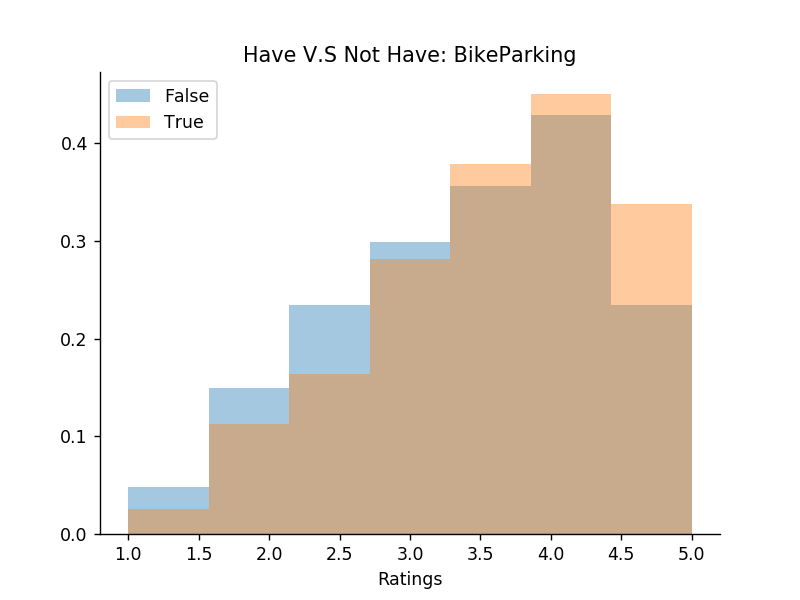

<IPython.core.display.Javascript object>


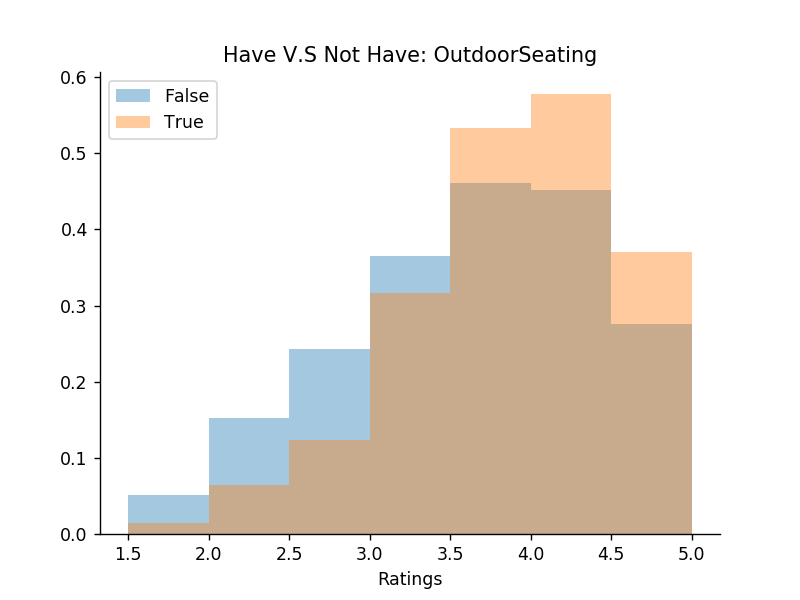

In [102]:
def dist_comp(col):
    plt.figure()
    plt.hist(join_df[join_df[col] == "False"]['stars'],label = 'False',density = True,alpha = 0.4,bins = 7);
    plt.hist(join_df[join_df[col] == "True"]['stars'],label = 'True',density = True,alpha = 0.4,bins = 7);
    sns.despine(right = 'True',top = 'True')
    plt.title('Have V.S Not Have: '+col)
    plt.xlabel('Ratings')
    plt.legend()
for col in join_df.columns[5:8]:
    dist_comp(col)

In [95]:
join_df.iloc[:,3:15].head()

,is_open,RestaurantsReservations,RestaurantsGoodForGroups,BikeParking,OutdoorSeating,RestaurantsTakeOut,BusinessAcceptsCreditCards,RestaurantsPriceRange2,GoodForKids,RestaurantsDelivery,RestaurantsAttire,0
business_id,,,,,,,,,,,,
tstimHoMcYbkSC4eBA1wEg,1,False,True,True,False,True,True,1,True,False,casual,-0.037474
sKhDrZFCJqfRNylkHrIDsQ,1,False,False,True,True,True,True,2,False,False,casual,-0.036518
4n81G-pmC3rfhmaPsbwYKg,1,False,False,False,False,False,False,1,False,False,casual,-0.027768
eY98EH_PHGnJVaJ7t2UpoQ,0,False,True,False,False,True,True,1,True,True,casual,-0.012948
iA9xu-6oOFynZQxO5qrauQ,1,False,False,False,False,False,False,1,False,False,casual,-0.029192


<IPython.core.display.Javascript object>


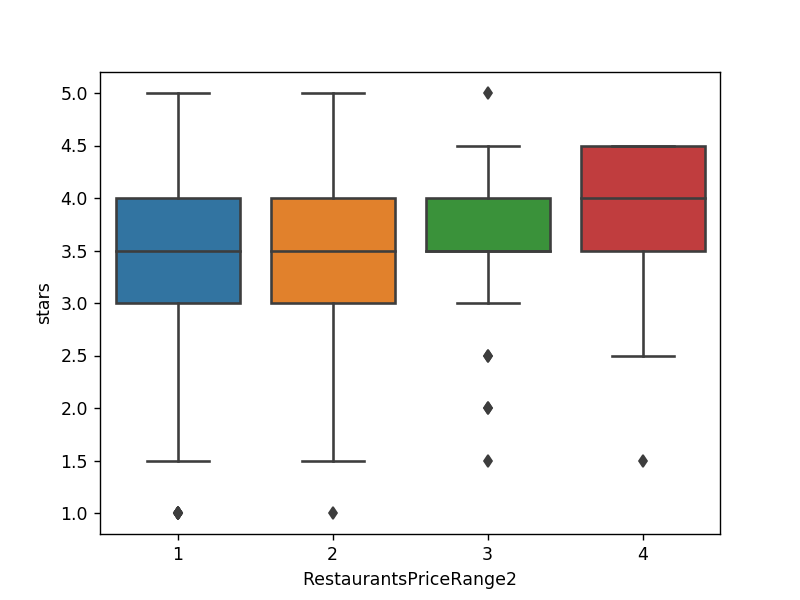

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [106]:
plt.figure()
sns.boxplot(y="stars",x="RestaurantsPriceRange2",data=join_df)